<h1><center>Module 15: Lesson 5 Data Exploration 1 assignment</center></h1>

## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 


_________________________________________________________________________________________________________________

##### Import data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

pd.set_option('display.max_columns', 500)

##### Grab data

In [9]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

_________________________________________________________________________________________________________________

##### Question 1

* Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [11]:
# make a copy for comparison...
education_df2 = education_df.copy()

In [12]:
# go through data cleaning process...

# create a fill_list of all columns...    
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

# create dataframe **states** that finds unique value of state in original dataframe...
states = education_df["STATE"].unique()

# loop through state value in states and interpolate values...
for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

In [13]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,1.038843e+06,22874.634120,72083.415236,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,1.482245e+06,34605.068547,87006.137056,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,1.545200e+04,91.000000,4528.000000,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,2.443388e+05,3753.000000,20988.000000,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,6.059525e+05,13068.500000,51156.500000,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,1.046753e+06,28808.500000,79618.000000,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,249524.000000,530531.000000,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


In [14]:
education_df2['AVG_MATH_4_SCORE'].describe()

count    536.000000
mean     234.768293
std       10.221511
min      187.134670
25%      229.694352
50%      237.238552
75%      241.995486
max      253.420961
Name: AVG_MATH_4_SCORE, dtype: float64

In [15]:
education_df['AVG_MATH_4_SCORE'].describe()

count    466.000000
mean     236.909728
std        8.695903
min      187.134670
25%      232.760641
50%      238.394124
75%      242.602566
max      253.420961
Name: AVG_MATH_4_SCORE, dtype: float64

In [16]:
education_df2['AVG_READING_4_SCORE'].describe()

count    533.000000
mean     218.866154
std        7.769616
min      178.557612
25%      214.663401
50%      220.416034
75%      223.999337
max      236.773867
Name: AVG_READING_4_SCORE, dtype: float64

In [17]:
education_df['AVG_READING_4_SCORE'].describe()

count    466.000000
mean     219.508638
std        7.426546
min      181.626990
25%      215.338956
50%      221.130461
75%      224.531280
max      236.773867
Name: AVG_READING_4_SCORE, dtype: float64

I find rather interesting that comparing the cleaned vs non cleaned standard deviations for the cleaned and uncleaned data results in a more subtantial decrease for the average MATH score than the average READING score.

##### Question 2

* Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [18]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0,9633.0,60949.0,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,1193260.0,220650.0,877190.0,4495.0,64613.0,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,636106.0,127007.0,203555.0,1980.0,36442.0,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0,73233.0,469965.0,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,1127563.0,143767.0,588209.0,12520.0,50707.0,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


In [19]:
# create dataframe that is just Ohio...
ohio = education_df[education_df.STATE == 'OHIO']

In [22]:
ohio.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
452,2000_OHIO,OHIO,2000,1822566.0,15327834.0,843432.0,6425872.0,8058530.0,14909952.0,7497388.0,4889221.0,725617.0,1378528.0,22988.0,128640.0,143373.0,139740.0,119704.0,1133611.0,541403.0,1698002.0,230.574217,282.672754,222.435965,270.165042
608,2003_OHIO,OHIO,2003,1803966.0,18018740.0,1097349.0,7844992.0,9076399.0,18760200.0,8958790.0,6097596.0,800930.0,2324140.0,26151.0,134036.0,136776.0,147064.0,127993.0,1118015.0,567226.0,1711392.0,237.782068,281.607295,221.865799,266.313690
711,2005_OHIO,OHIO,2005,1778784.0,19746239.0,1413888.0,8313858.0,10018493.0,19785561.0,9700668.0,6526386.0,830761.0,2046199.0,29791.0,135854.0,131691.0,144869.0,130436.0,1095686.0,578352.0,1703829.0,242.105935,283.251775,222.533254,252.869063
816,2007_OHIO,OHIO,2007,1758645.0,22142424.0,1461326.0,9341723.0,11339375.0,21336580.0,10202242.0,6930905.0,876199.0,2595974.0,32815.0,130889.0,132634.0,139939.0,134417.0,1077618.0,585862.0,1696295.0,244.532732,284.851639,225.666988,269.734589
924,2009_OHIO,OHIO,2009,1729072.0,22779344.0,1531263.0,10226228.0,11021853.0,22427481.0,10734314.0,7347959.0,929409.0,2552105.0,29329.0,131114.0,133751.0,134169.0,118872.0,1064903.0,538951.0,1633183.0,243.687553,285.583014,224.532178,272.802634
1028,2011_OHIO,OHIO,2011,1655534.0,23488657.0,2533882.0,9834235.0,11120540.0,23010396.0,11074360.0,7570565.0,935953.0,2494681.0,29015.0,131323.0,130406.0,134219.0,117866.0,1056888.0,522804.0,1608707.0,244.038622,288.602597,223.828214,255.861635
1132,2013_OHIO,OHIO,2013,1613718.0,22536516.0,1721213.0,8990516.0,11824787.0,22015797.0,10800145.0,7376469.0,916885.0,1998557.0,28477.0,131003.0,128668.0,135042.0,114607.0,1049020.0,515611.0,1593108.0,245.549797,289.528097,223.887746,266.346063
1234,2015_OHIO,OHIO,2015,1600222.0,24378660.0,1676820.0,10169760.0,12532080.0,22561728.0,11620080.0,7324444.0,922732.0,1750785.0,33118.0,124097.0,127995.0,131692.0,119952.0,1037775.0,521595.0,1592488.0,243.598591,285.061955,224.930420,260.594557
1482,2017_OHIO,OHIO,2017,1595024.0,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,7357292.0,956321.0,1854842.0,33118.0,124097.0,127995.0,131692.0,119952.0,1037775.0,521595.0,1592488.0,240.928372,287.714266,225.261138,265.081922


In [21]:
ohio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 452 to 1482
Data columns (total 25 columns):
PRIMARY_KEY                     9 non-null object
STATE                           9 non-null object
YEAR                            9 non-null int64
ENROLL                          9 non-null float64
TOTAL_REVENUE                   9 non-null float64
FEDERAL_REVENUE                 9 non-null float64
STATE_REVENUE                   9 non-null float64
LOCAL_REVENUE                   9 non-null float64
TOTAL_EXPENDITURE               9 non-null float64
INSTRUCTION_EXPENDITURE         9 non-null float64
SUPPORT_SERVICES_EXPENDITURE    9 non-null float64
OTHER_EXPENDITURE               9 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      9 non-null float64
GRADES_PK_G                     9 non-null float64
GRADES_KG_G                     9 non-null float64
GRADES_4_G                      9 non-null float64
GRADES_8_G                      9 non-null float64
GRADES_12_G                    

In [28]:
ohio['date'] = pd.to_datetime(ohio['YEAR'].astype(str), format='%Y')

In [29]:
ohio.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,date
452,2000_OHIO,OHIO,2000,1822566.0,15327834.0,843432.0,6425872.0,8058530.0,14909952.0,7497388.0,4889221.0,725617.0,1378528.0,22988.0,128640.0,143373.0,139740.0,119704.0,1133611.0,541403.0,1698002.0,230.574217,282.672754,222.435965,270.165042,2000-01-01
608,2003_OHIO,OHIO,2003,1803966.0,18018740.0,1097349.0,7844992.0,9076399.0,18760200.0,8958790.0,6097596.0,800930.0,2324140.0,26151.0,134036.0,136776.0,147064.0,127993.0,1118015.0,567226.0,1711392.0,237.782068,281.607295,221.865799,266.313690,2003-01-01
711,2005_OHIO,OHIO,2005,1778784.0,19746239.0,1413888.0,8313858.0,10018493.0,19785561.0,9700668.0,6526386.0,830761.0,2046199.0,29791.0,135854.0,131691.0,144869.0,130436.0,1095686.0,578352.0,1703829.0,242.105935,283.251775,222.533254,252.869063,2005-01-01
816,2007_OHIO,OHIO,2007,1758645.0,22142424.0,1461326.0,9341723.0,11339375.0,21336580.0,10202242.0,6930905.0,876199.0,2595974.0,32815.0,130889.0,132634.0,139939.0,134417.0,1077618.0,585862.0,1696295.0,244.532732,284.851639,225.666988,269.734589,2007-01-01
924,2009_OHIO,OHIO,2009,1729072.0,22779344.0,1531263.0,10226228.0,11021853.0,22427481.0,10734314.0,7347959.0,929409.0,2552105.0,29329.0,131114.0,133751.0,134169.0,118872.0,1064903.0,538951.0,1633183.0,243.687553,285.583014,224.532178,272.802634,2009-01-01


In [35]:
ohio = ohio.set_index(ohio['date'])

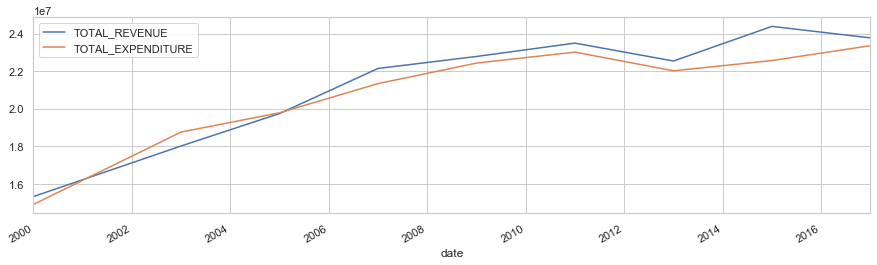

In [41]:
ohio[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].plot(figsize=(15,4))

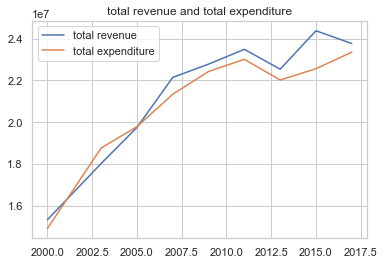

In [30]:
### thinkful answer...

plt.plot(education_df.loc[education_df.STATE == "OHIO", "YEAR"],
         education_df.loc[education_df.STATE == "OHIO", "TOTAL_REVENUE"], label="total revenue")

plt.plot(education_df.loc[education_df.STATE == "OHIO", "YEAR"],
         education_df.loc[education_df.STATE == "OHIO", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

##### Question 3

* In your chosen state, which of the lessons are the students more successful, math or reading?

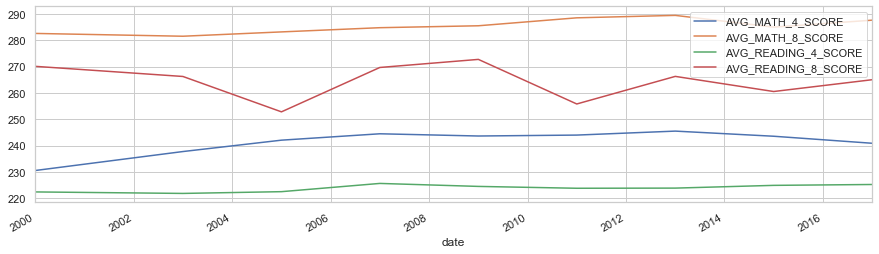

In [42]:
ohio[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].plot(figsize=(15,4))

The MATH scores were higher for all years for both Grade8 and Grade4.

##### Question 4

* What are the distributions of the math and reading scores in the sample?

Text(0.5, 1.0, 'histogram of AVG_READING_4_SCORE')

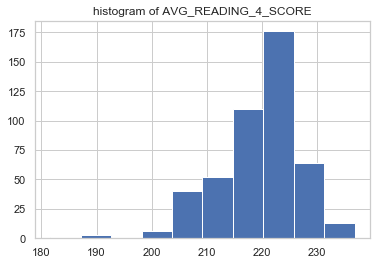

In [43]:
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

Text(0.5, 1.0, 'histogram of AVG_MATH_4_SCORE')

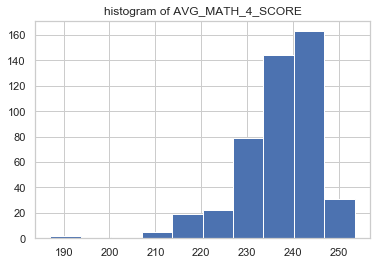

In [44]:
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

Text(0.5, 1.0, 'histogram of AVG_READING_8_SCORE')

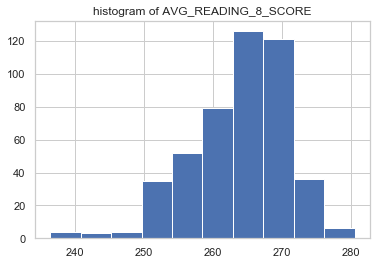

In [45]:
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

Text(0.5, 1.0, 'histogram of AVG_MATH_8_SCORE')

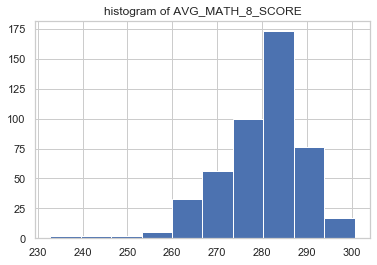

In [46]:
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))

##### Question 5

* Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

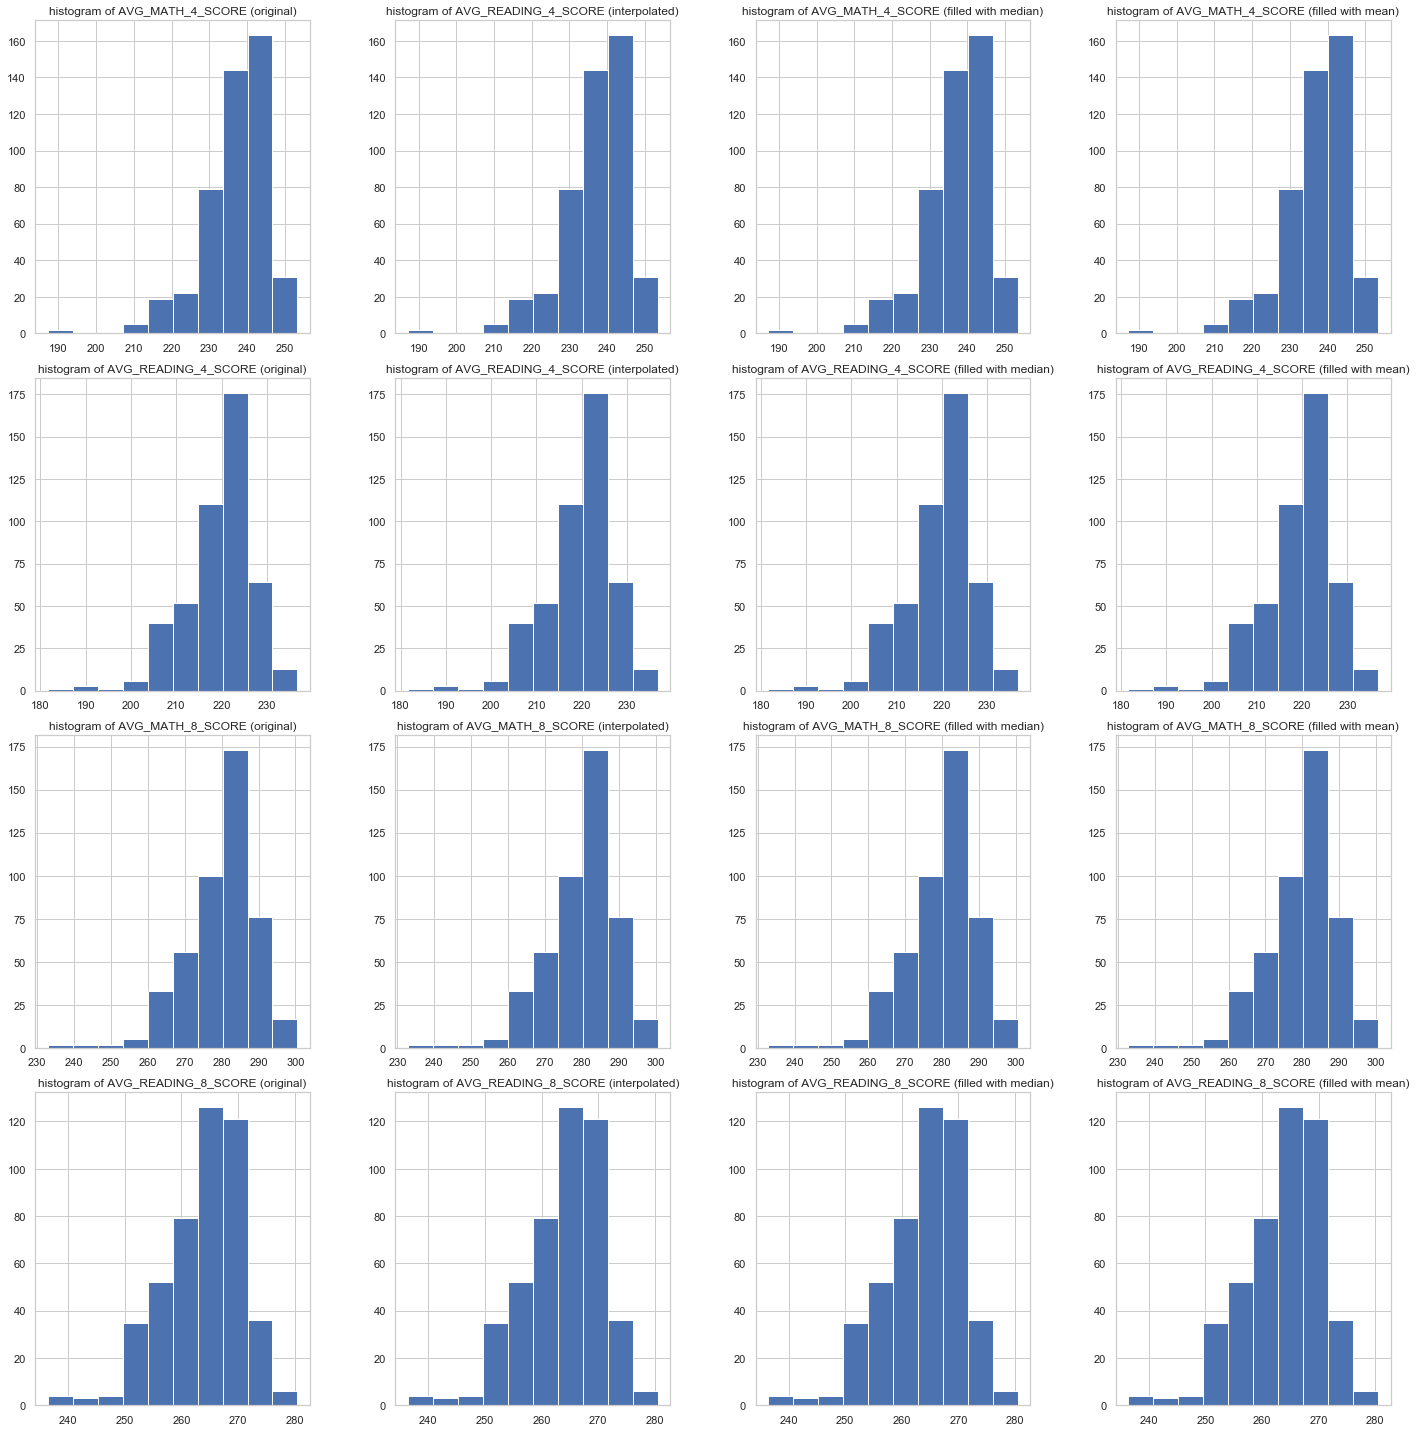

In [48]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()
